This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
938/938 [==============================] - 30s 11ms/step - loss: 0.1620 - accuracy: 0.9497
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0186 - accuracy: 0.9943


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

### Visualizacion kernel de primer CNN

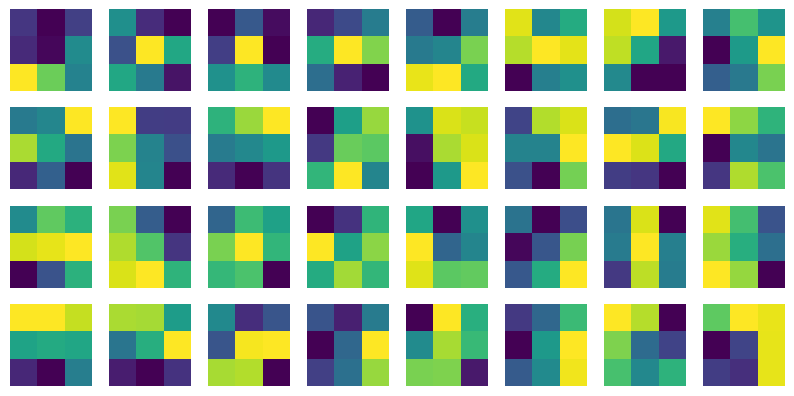

In [ ]:
# Obtenemos los pesos de la capa convolucional que deseas visualizar (por ejemplo, la primera capa convolucional)
conv_layer = model.layers[1]  # Cambia el índice según sea necesario
weights, biases = conv_layer.get_weights()

# Visualiza los kernels
plt.figure(figsize=(10, 10))
for i in range(weights.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.show()

#un color oscuro indica un valor cercano a -1 mientras que el color amarillo es cercano a 1

In [ ]:
# weights del primer filtro
print('weights del primer filtro: \n',weights[:, :, 0, 0])
# bias del primer filtro
print('sesgo del primer filtro: \n',biases[0])

weights del primer filtro: 
 [[-0.07882086 -0.14010094 -0.06662542]
 [-0.0936535  -0.13314304  0.04729637]
 [ 0.24752165  0.16056968  0.03211296]]
sesgo del primer filtro: 
 0.008277695


In [ ]:
print('weights: \n',weights)
print('sesgos: \n',biases)

weights: 
 [[[[-0.07882086  0.04287317 -0.11911798 -0.12451504 -0.13965021
     0.11196936  0.22456168  0.00113202 -0.03255687 -0.0120583
     0.0455315  -0.24472278 -0.0546826  -0.13259009 -0.01606022
     0.17283994 -0.06694677  0.10937916 -0.07493772 -0.2402559
     0.01258733 -0.07409808 -0.06891994  0.14143051  0.1802079
     0.1501171   0.01913463 -0.10259363 -0.16318017 -0.19825232
     0.20049608  0.07697939]]

  [[-0.14010094 -0.05793418 -0.03309563 -0.07954349 -0.30110162
    -0.04268762  0.26082233  0.07451948 -0.00633366 -0.10571428
     0.14745988  0.00472468  0.14075562  0.1380144  -0.01017675
     0.12971321  0.05660977 -0.15029822  0.04423676 -0.17490861
    -0.25479922 -0.2554999   0.16345564  0.03612468  0.17967072
     0.14560756 -0.05502401 -0.17289713  0.12790917 -0.11258874
     0.1471923   0.14282224]]

  [[-0.06662542 -0.09268038 -0.10904223  0.00104485 -0.06577017
     0.00491719 -0.00133331  0.02329446  0.25585577 -0.10652927
     0.22308713  0.12892878  0.129

### Visualizacion kernel de segunda CNN

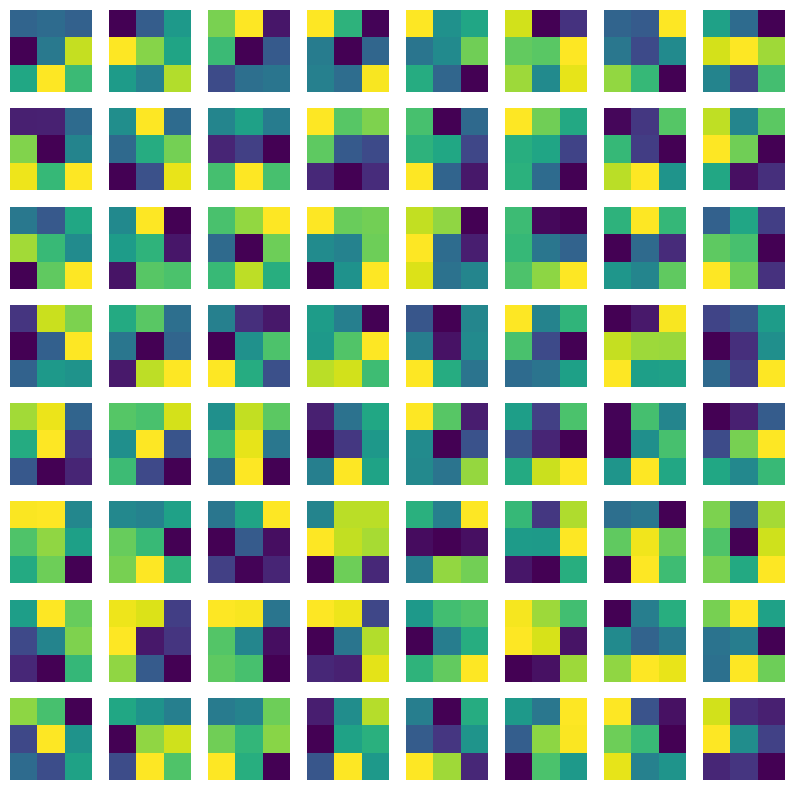

In [ ]:
# Obtenemos los pesos de la capa convolucional que deseas visualizar (por ejemplo, la primera capa convolucional)
conv_layer = model.layers[3]  # Cambia el índice según sea necesario
weights_2, biases_2 = conv_layer.get_weights()

# Visualiza los kernels
plt.figure(figsize=(10, 10))
for i in range(weights_2.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(weights_2[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.show()

In [ ]:
# weights del segundo filtro
print('weights del segundo filtro: \n',weights_2[:, :, 0, 0])
# bias del segundo filtro
print('sesgo del segundo filtro: \n',biases_2[0])

weights del segundo filtro: 
 [[ 0.07373608  0.06062258 -0.07220849]
 [-0.07384498  0.19456676  0.2681362 ]
 [-0.07072092  0.03808115  0.17467599]]
sesgo del segundo filtro: 
 -0.04560599


### Visualizacion kernel de tercera capa de CNN

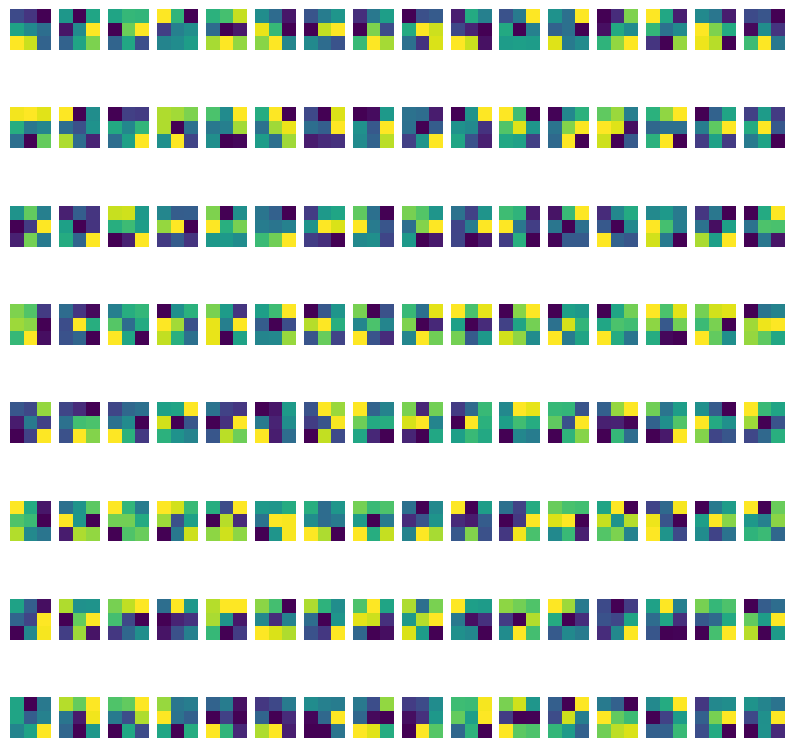

In [ ]:
# Obtenemos los pesos de la capa convolucional que deseas visualizar (por ejemplo, la primera capa convolucional)
conv_layer = model.layers[5]  # Cambia el índice según sea necesario
weights_3, biases_3 = conv_layer.get_weights()

# Visualiza los kernels
plt.figure(figsize=(10, 10))
for i in range(weights_3.shape[3]):
    plt.subplot(8, 16, i + 1)
    plt.imshow(weights_3[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.show()

In [ ]:
# weights del tercer filtro
print('weights del tercer filtro: \n',weights_3[:, :, 0, 0])
# bias del tercer filtro
print('sesgo del tercer filtro: \n',biases_3[0])

weights del tercer filtro: 
 [[-0.05580435 -0.07153974 -0.10468023]
 [ 0.02103837 -0.00234212 -0.02648528]
 [ 0.11132417  0.09423359 -0.035819  ]]
sesgo del tercer filtro: 
 -0.053533904


### Visualizacion de Feature Maps para primer capa CNN

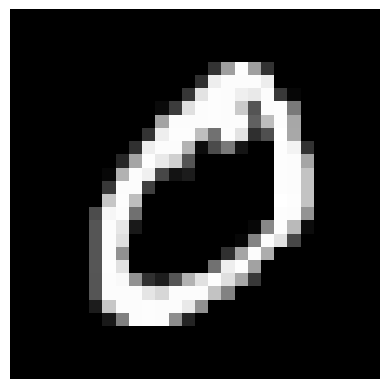

In [ ]:
# Mostrar la primera imagen del conjunto de datos MNIST
plt.imshow(train_images[1], cmap='gray')
plt.axis('off')  # Desactivar ejes
plt.show()

In [ ]:
model.layers

#### Salida de CNN layer

1/1 [==============================] - 0s 110ms/step


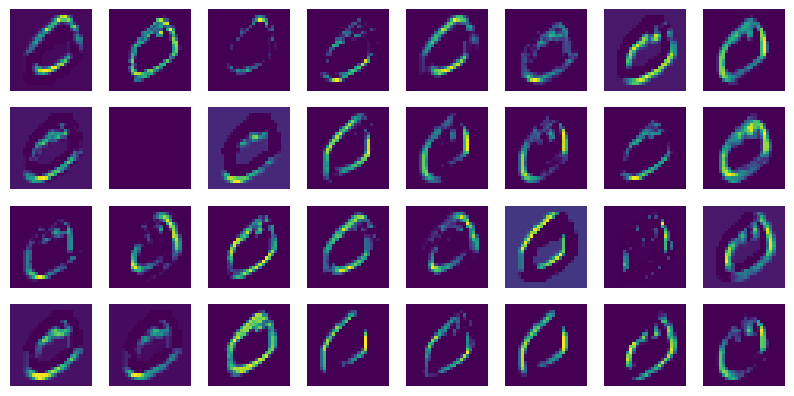

In [ ]:
# Carga una imagen de entrada (asegúrate de que tenga las mismas dimensiones que las entradas de tu modelo)
input_image = train_images[1]  # Cambia esto según tus necesidades

# Define un nuevo modelo que solo tenga las capas de interés (hasta la capa que deseas visualizar)
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[1].output)  # Cambia el índice según sea necesario

# Calcula los feature maps para la imagen de entrada
feature_maps = visualization_model.predict(np.expand_dims(input_image, axis=0))

# Visualiza los feature maps
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

#### Salida de Pooling (max)

1/1 [==============================] - 0s 155ms/step


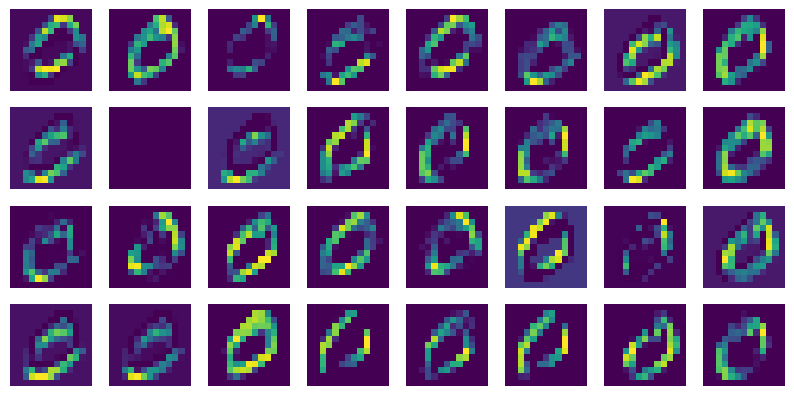

In [ ]:
# Carga una imagen de entrada (asegúrate de que tenga las mismas dimensiones que las entradas de tu modelo)
# input_image = train_images[0]  # Cambia esto según tus necesidades

# Define un nuevo modelo que solo tenga las capas de interés (hasta la capa que deseas visualizar)
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[2].output)  # Cambia el índice según sea necesario

# Calcula los feature maps para la imagen de entrada
feature_maps = visualization_model.predict(np.expand_dims(input_image, axis=0))

# Visualiza los feature maps
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

#### Salida de 2da capa CNN

1/1 [==============================] - 0s 149ms/step


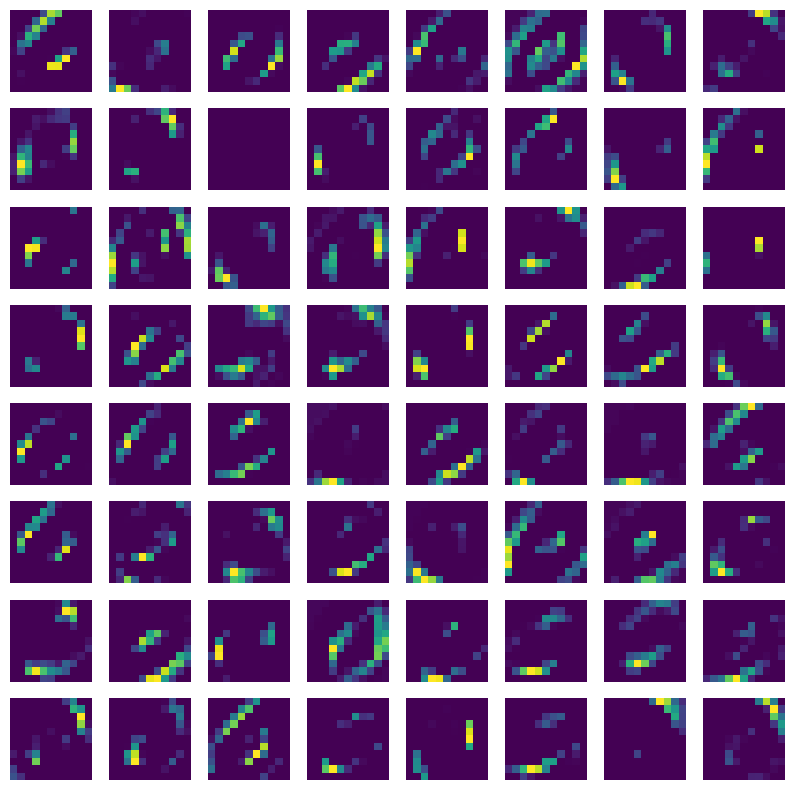

In [ ]:
# Carga una imagen de entrada (asegúrate de que tenga las mismas dimensiones que las entradas de tu modelo)
# input_image = train_images[0]  # Cambia esto según tus necesidades

# Define un nuevo modelo que solo tenga las capas de interés (hasta la capa que deseas visualizar)
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[3].output)  # Cambia el índice según sea necesario

# Calcula los feature maps para la imagen de entrada
feature_maps = visualization_model.predict(np.expand_dims(input_image, axis=0))

# Visualiza los feature maps
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

#### Salida de 2da capa Pooling (max)

1/1 [==============================] - 0s 203ms/step


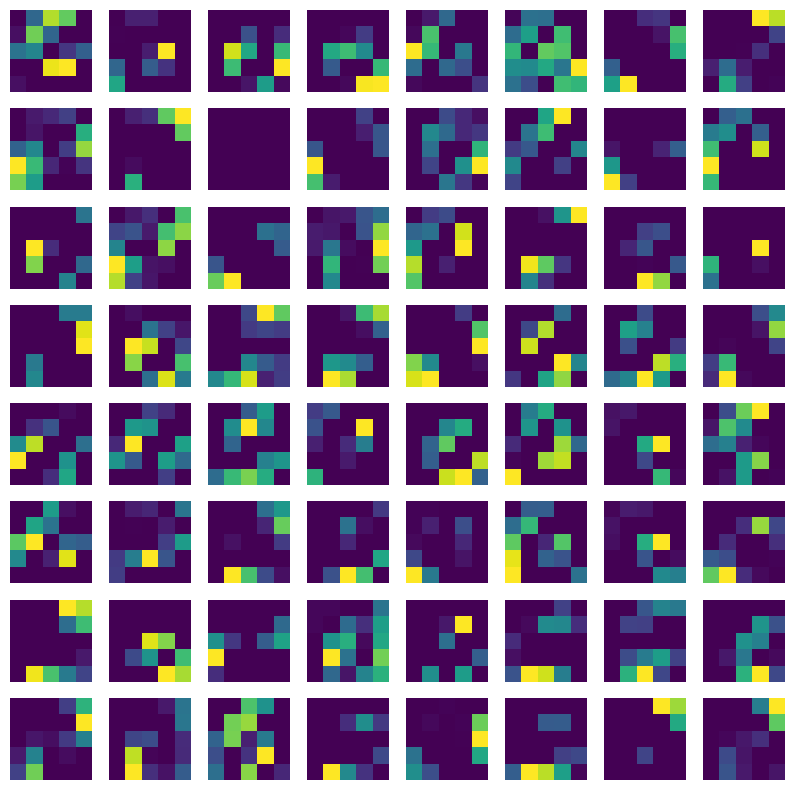

In [ ]:
# Carga una imagen de entrada (asegúrate de que tenga las mismas dimensiones que las entradas de tu modelo)
# input_image = train_images[0]  # Cambia esto según tus necesidades

# Define un nuevo modelo que solo tenga las capas de interés (hasta la capa que deseas visualizar)
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[4].output)  # Cambia el índice según sea necesario

# Calcula los feature maps para la imagen de entrada
feature_maps = visualization_model.predict(np.expand_dims(input_image, axis=0))

# Visualiza los feature maps
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

#### Salida de 3ra capa CNN

1/1 [==============================] - 0s 99ms/step


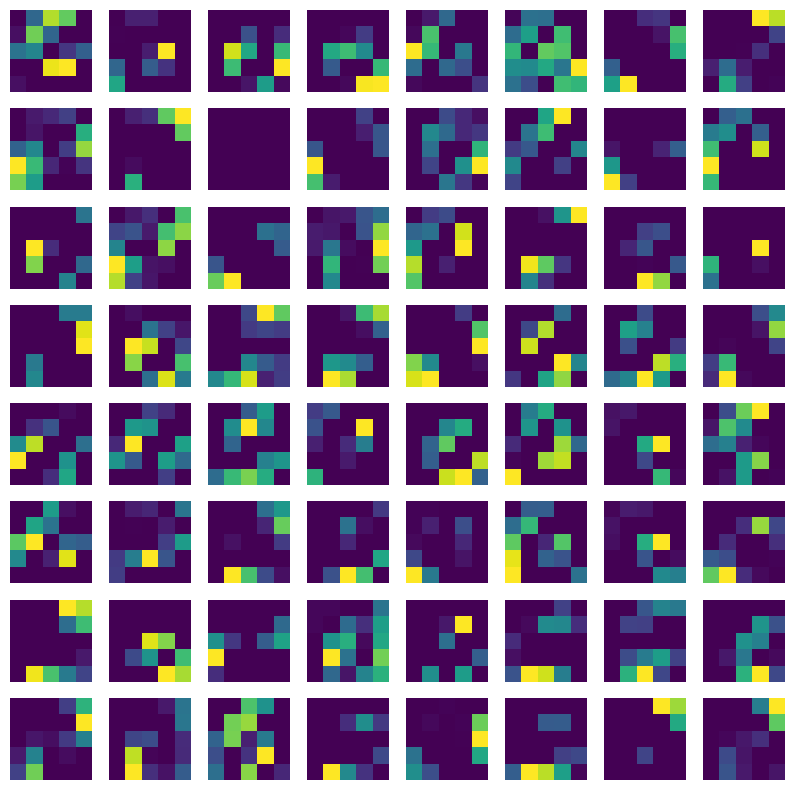

In [ ]:
# Carga una imagen de entrada (asegúrate de que tenga las mismas dimensiones que las entradas de tu modelo)
# input_image = train_images[0]  # Cambia esto según tus necesidades

# Define un nuevo modelo que solo tenga las capas de interés (hasta la capa que deseas visualizar)
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[4].output)  # Cambia el índice según sea necesario

# Calcula los feature maps para la imagen de entrada
feature_maps = visualization_model.predict(np.expand_dims(input_image, axis=0))

# Visualiza los feature maps
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

**Evaluating the convnet**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0247 - accuracy: 0.9920
Test accuracy: 0.992


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Displaying curves of loss and accuracy during training**

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

**Plotting the results**

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Summary